In [77]:
# Importar as bibliotecas
import statistics as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Preparação dos dados

## Recolha de dados

In [114]:
file_path = "Car_Insurance_Claim.csv"
dataset = pd.read_csv(file_path)

In [115]:
dataset_final = dataset.copy()

## Eliminar colunas irrelevantes para o modelo

In [116]:
removed_cols = [col for col in ["ID", "POSTAL_CODE"] if col in dataset_final.columns]
dataset_final.drop(columns=removed_cols, inplace=True)

## Eliminar valores omissos

In [117]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(dataset[['CREDIT_SCORE', 'ANNUAL_MILEAGE']])
dataset_final[['CREDIT_SCORE', 'ANNUAL_MILEAGE']] = imputer.transform(dataset[['CREDIT_SCORE', 'ANNUAL_MILEAGE']])

num_obs_antes = dataset_final.shape[0]
cols_numeric = ['CREDIT_SCORE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS']

for col in numeric_cols:
    p99 = dataset_final[col].quantile(0.99)
    dataset_final = dataset_final[dataset_final[col] <= p99]

num_obs_depois = dataset_final.shape[0]
observacoes_removidas = num_obs_antes - num_obs_depois
print(f"Número de observações eliminadas: {observacoes_removidas}")


Número de observações eliminadas: 399


In [110]:
# Verificar existência de valores omissos
dataset_final.isnull().sum()

AGE                    0
GENDER                 0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

## Tratamento de outliers

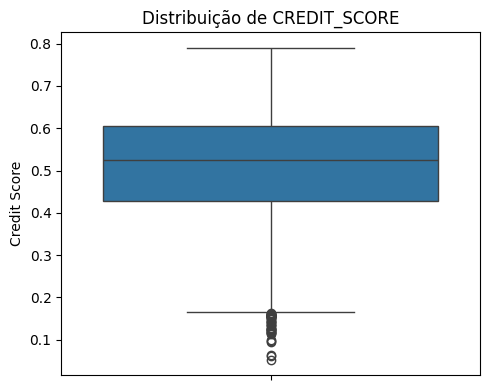

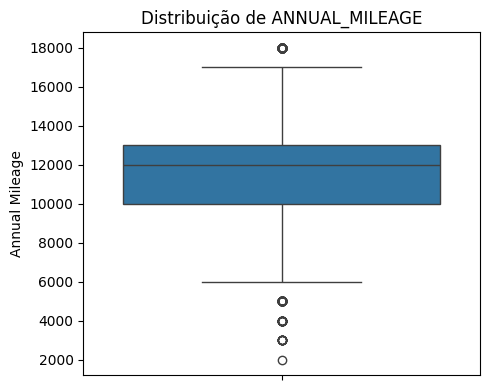

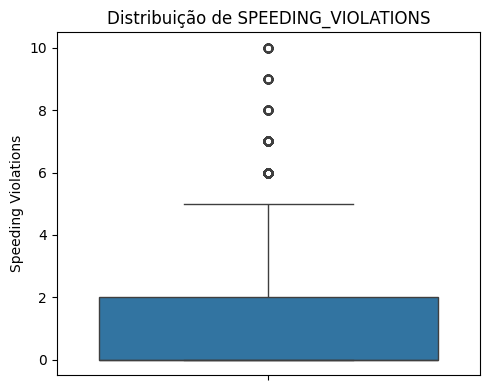

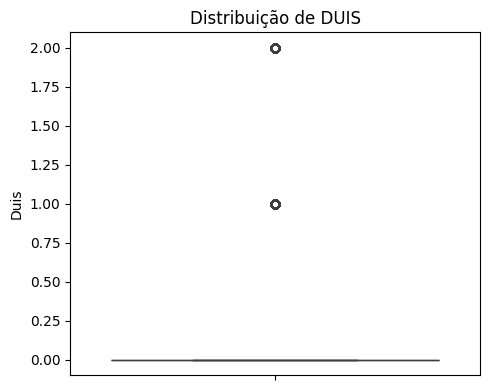

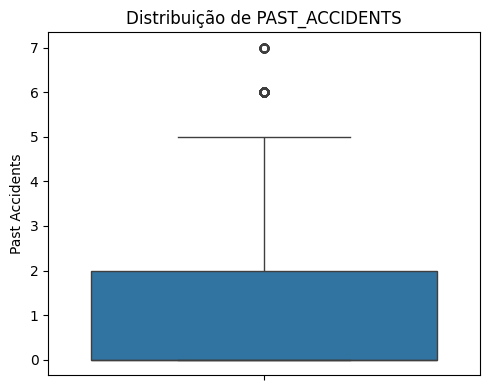

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de variáveis numéricas a inspecionar
cols_numeric = ['CREDIT_SCORE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS']

# Gerar boxplot individual para cada variável
for col in cols_numeric:
    plt.figure(figsize=(5, 4))
    sns.boxplot(y=dataset_final[col])
    plt.title(f'Distribuição de {col}')
    plt.ylabel(col.replace("_", " ").title())
    plt.tight_layout()
    plt.show()


##Nota
Nao faz sentido remover outliers pois não existe nenhum critico e o método de remoção pelo IQR neste caso irá remover dados uteis

In [ ]:
#def remove_outlier_IQR(df_subset):
#    Q1 = df_subset.quantile(0.25)
#    Q3 = df_subset.quantile(0.75)
#    IQR = Q3 - Q1
#    # Apenas mantém as linhas que estão dentro dos limites
#    df_filtered = df_subset[~((df_subset < (Q1 - 1.5 * IQR)) | (df_subset > (Q3 + 1.5 * IQR))).any(axis=1)]
#    return df_filtered

In [ ]:
# Passo 1: Obter as linhas sem outliers com base nas colunas numéricas
#df_outlier_removed = remove_outlier_IQR(dataset_final[cols_numeric])

# Passo 2: Identificar os índices das linhas com outliers (i.e., os que foram removidos)
#ind_diff = dataset_final.index.difference(df_outlier_removed.index)

# Passo 3: Remover cada linha com outlier (uma a uma)
#for i in range(0, len(ind_diff), 1):
#    dataset_final = dataset_final.drop([ind_diff[i]])


# Passo 4: Mostrar quantas linhas com outliers foram removidas
#print(f"Foram removidas {len(ind_diff)} linhas com outliers nas variáveis: {', '.join(cols_numeric)}.")
#print(f"O dataset final contém {dataset_final.shape[0]} observações.")

#Verificar o número de outliers removidos.
#print("Foram removidos ",len(ind_diff),"outliers.")

Foram removidas 2222 linhas com outliers nas variáveis: CREDIT_SCORE, ANNUAL_MILEAGE, SPEEDING_VIOLATIONS, DUIS, PAST_ACCIDENTS.
O dataset final contém 7379 observações.
Foram removidos  2222 outliers.


## Codificar variáveis categóricas

In [92]:
ordinal_features = ['AGE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'VEHICLE_YEAR']
ordinal_categories = [
    ['16-25', '26-39', '40-64', '65+'],
    ['0-9y', '10-19y', '20-29y', '30y+'],
    ['none', 'high school', 'university'],
    ['poverty', 'working class', 'middle class', 'upper class'],
    ['before 2015', 'after 2015']
]

# Variáveis nominais para One-Hot Encoding
nominal_features = ['GENDER', 'VEHICLE_TYPE']

# Criar ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=ordinal_categories), ordinal_features),
        ('nom', OneHotEncoder(drop='first', sparse_output=False), nominal_features)
    ],
    remainder='passthrough'
)

# 4. Aplicar transformação ao dataset completo
encoded_array = preprocessor.fit_transform(dataset_final)

# 5. Reconstruir DataFrame com os nomes corretos
ord_cols = ordinal_features
nom_cols = preprocessor.named_transformers_['nom'].get_feature_names_out(nominal_features)
rest_cols = [col for col in dataset_final.columns if col not in ordinal_features + nominal_features]
final_columns = list(ord_cols) + list(nom_cols) + rest_cols

dataset_encoded = pd.DataFrame(encoded_array, columns=final_columns)

# 6. Separar X e y depois de reconstruir o DataFrame
X = dataset_encoded.drop(columns=['OUTCOME'])
y = dataset_encoded['OUTCOME']

# 7. Codificar y se necessário
le = LabelEncoder()
y = le.fit_transform(y)

dataset_final = pd.DataFrame(dataset_encoded, columns=final_columns)

In [93]:
# Mostrar amostra do resultado
dataset_final.head()

,AGE,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_YEAR,GENDER_male,VEHICLE_TYPE_sports car,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,3.0,0.0,1.0,3.0,1.0,0.0,0.0,0.629027,1.0,0.0,1.0,12000.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.357757,0.0,0.0,0.0,16000.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.493146,1.0,0.0,0.0,11000.0,0.0,0.0,0.0,0.0
3,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.206013,1.0,0.0,1.0,11000.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.388366,1.0,0.0,0.0,12000.0,2.0,0.0,1.0,1.0


In [94]:
dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9600 entries, 0 to 9599
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AGE                      9600 non-null   float64
 1   DRIVING_EXPERIENCE       9600 non-null   float64
 2   EDUCATION                9600 non-null   float64
 3   INCOME                   9600 non-null   float64
 4   VEHICLE_YEAR             9600 non-null   float64
 5   GENDER_male              9600 non-null   float64
 6   VEHICLE_TYPE_sports car  9600 non-null   float64
 7   CREDIT_SCORE             9600 non-null   float64
 8   VEHICLE_OWNERSHIP        9600 non-null   float64
 9   MARRIED                  9600 non-null   float64
 10  CHILDREN                 9600 non-null   float64
 11  ANNUAL_MILEAGE           9600 non-null   float64
 12  SPEEDING_VIOLATIONS      9600 non-null   float64
 13  DUIS                     9600 non-null   float64
 14  PAST_ACCIDENTS          

## Guardar dataset final

In [95]:
dataset_final.to_csv("Car_Insurance_Claim_Prepared.csv", index=False)

## Dividir o dataset em conjunto de treino e teste

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## Feature scalling

In [97]:
for i, col in enumerate(final_columns):
    print(f"{i}: {col}")

0: AGE
1: DRIVING_EXPERIENCE
2: EDUCATION
3: INCOME
4: VEHICLE_YEAR
5: GENDER_male
6: VEHICLE_TYPE_sports car
7: CREDIT_SCORE
8: VEHICLE_OWNERSHIP
9: MARRIED
10: CHILDREN
11: ANNUAL_MILEAGE
12: SPEEDING_VIOLATIONS
13: DUIS
14: PAST_ACCIDENTS
15: OUTCOME


In [98]:
scaler = StandardScaler()
numeric_cols = ['CREDIT_SCORE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS']

# Aplicar scaler às colunas numéricas com nomes (sem [:, ])
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Modelação dos Dados

## Modelo 1: Regressão Logística

A regressão logística é um modelo linear que prevê a probabilidade de uma classe binária.
Vamos treinar o modelo e avaliar o seu desempenho nas métricas de classificação.

## Ajuste de Hiperparâmetros com GridSearchCV

Para encontrar a melhor combinação de hiperparâmetros para cada modelo, utilizamos o `GridSearchCV`, uma técnica de validação cruzada exaustiva. 

### Como funciona o `GridSearchCV`?

- **GridSearchCV** recebe um dicionário de hiperparâmetros e testa todas as combinações possíveis.
- Para cada combinação, ele executa **validação cruzada (ex: k-fold)** e calcula a performance média.
- O modelo com melhor desempenho médio (por padrão, medido com `accuracy`) é selecionado.

### Exemplo: KNN
Testar `n_neighbors` de 1 a 20, e diferentes métricas de distância (euclidean, manhattan, minkowski).

### Porquê isto é importante?
Porque os valores padrão dos modelos muitas vezes **não são ideais** para todos os datasets. Ajustar hiperparâmetros pode:
- Aumentar a performance (accuracy, recall, etc.)
- Reduzir overfitting
- Produzir modelos mais robustos

Vamos aplicar o `GridSearchCV` a cada um dos modelos.

In [99]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

modelos_parametros = {
    "Logistic Regression": {
        "modelo": LogisticRegression(max_iter=1000),
        "parametros": {
            "C": [0.01, 0.1, 1, 10],
            "solver": ["liblinear", "lbfgs"]
        }
    },
    "KNN": {
        "modelo": KNeighborsClassifier(),
        "parametros": {
            "n_neighbors": list(range(1, 21)),
            "metric": ["euclidean", "manhattan", "minkowski"],
            "weights": ["uniform", "distance"]
        }
    },
    "Decision Tree": {
        "modelo": DecisionTreeClassifier(random_state=0),
        "parametros": {
            "criterion": ["gini", "entropy"],
            "max_depth": [None, 5, 10, 20],
            "min_samples_split": [2, 5, 10]
        }
    },
    "Random Forest": {
        "modelo": RandomForestClassifier(random_state=0),
        "parametros": {
            "n_estimators": [10, 50, 100],
            "criterion": ["gini", "entropy"],
            "max_depth": [None, 5, 10],
        }
    },
    "Naive Bayes": {
        "modelo": GaussianNB(),
        "parametros": {}
    },
    "SVM": {
        "modelo": SVC(),
        "parametros": {
            "C": [0.1, 1, 10],
            "kernel": ["linear", "rbf", "poly"],
            "gamma": ["scale", "auto"]
        }
    }
}

melhores_modelos = {}

for nome, dic in modelos_parametros.items():
    print(f"\nModelo a ajustar: {nome}")
    grid = GridSearchCV(dic["modelo"], dic["parametros"], cv=5, scoring="accuracy", n_jobs=-1)
    grid.fit(X_train, y_train)
    print("Melhor combinação:", grid.best_params_)
    print("Melhor accuracy média:", grid.best_score_)
    melhores_modelos[nome] = grid.best_estimator_



Modelo a ajustar: Logistic Regression
Melhor combinação: {'C': 0.1, 'solver': 'liblinear'}
Melhor accuracy média: 0.8364583333333334

Modelo a ajustar: KNN
Melhor combinação: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}
Melhor accuracy média: 0.8161458333333333

Modelo a ajustar: Decision Tree
Melhor combinação: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 10}
Melhor accuracy média: 0.83359375

Modelo a ajustar: Random Forest
Melhor combinação: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 100}
Melhor accuracy média: 0.8283854166666667

Modelo a ajustar: Naive Bayes
Melhor combinação: {}
Melhor accuracy média: 0.7744791666666667

Modelo a ajustar: SVM
Melhor combinação: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Melhor accuracy média: 0.8337239583333333


In [100]:
# 1. Imports necessários
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# 2. Definir CV 10×10 estratificada
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=42)

# 3. Iterar sobre o teu dicionário modelos_parametros
resultados = []
modelos_otimizados = {}

for nome, info in modelos_parametros.items():
    # Pipeline: scalamento + classificador
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', info['modelo'])
    ])
    # Prefixar parâmetros para o GridSearch
    param_grid = {f"clf__{param}": valores 
                  for param, valores in info['parametros'].items()}

    grid = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        scoring='f1_macro',       # podes mudar para 'accuracy' se quiseres
        cv=cv,
        n_jobs=-1,
        verbose=1,
        return_train_score=False
    )
    grid.fit(X_train, y_train)

    # Guardar o melhor pipeline e resultados
    modelos_otimizados[nome] = grid.best_estimator_
    df = pd.DataFrame(grid.cv_results_).assign(Modelo=nome)
    resultados.append(df)

# 4. Concatenar e exportar resultados completos
resultados_grid = pd.concat(resultados, ignore_index=True)
resultados_grid.to_csv("resultados_gridsearch_todos.csv", index=False)
print("Resultados do Grid Search salvos em 'resultados_gridsearch_todos.csv'")


Fitting 100 folds for each of 8 candidates, totalling 800 fits
Fitting 100 folds for each of 120 candidates, totalling 12000 fits
Fitting 100 folds for each of 24 candidates, totalling 2400 fits
Fitting 100 folds for each of 18 candidates, totalling 1800 fits
Fitting 100 folds for each of 1 candidates, totalling 100 fits
Fitting 100 folds for each of 18 candidates, totalling 1800 fits
Resultados do Grid Search salvos em 'resultados_gridsearch_todos.csv'


## Avaliação Final dos Modelos com os Melhores Hiperparâmetros

A seguir, utilizamos os melhores parâmetros encontrados durante o processo de `GridSearchCV` para treinar e avaliar cada modelo no conjunto de teste.

Cada modelo será avaliado com base em:
- Matriz de confusão
- Relatório de classificação (precision, recall, F1-score)
- Accuracy

Isto permite comparar o desempenho real dos modelos depois do ajuste.

## Comparação das Métricas dos Modelos

Apresentamos aqui os resultados comparativos entre os modelos treinados.

In [101]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Usar os pipelines otimizados
metricas_modelos = []
for nome, modelo in modelos_otimizados.items():
    y_pred = modelo.predict(X_test)
    metricas_modelos.append({
        "Modelo": nome,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    })

df_metricas = pd.DataFrame(metricas_modelos).sort_values(by="Accuracy", ascending=False)
display(df_metricas)

,Modelo,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.842708,0.752981,0.737896,0.745363
5,SVM,0.839063,0.727273,0.774624,0.750202
3,Random Forest,0.833333,0.735245,0.727880,0.731544
2,Decision Tree,0.833333,0.735245,0.727880,0.731544
1,KNN,0.828125,0.711146,0.756260,0.733010
4,Naive Bayes,0.764062,0.588592,0.809683,0.681658


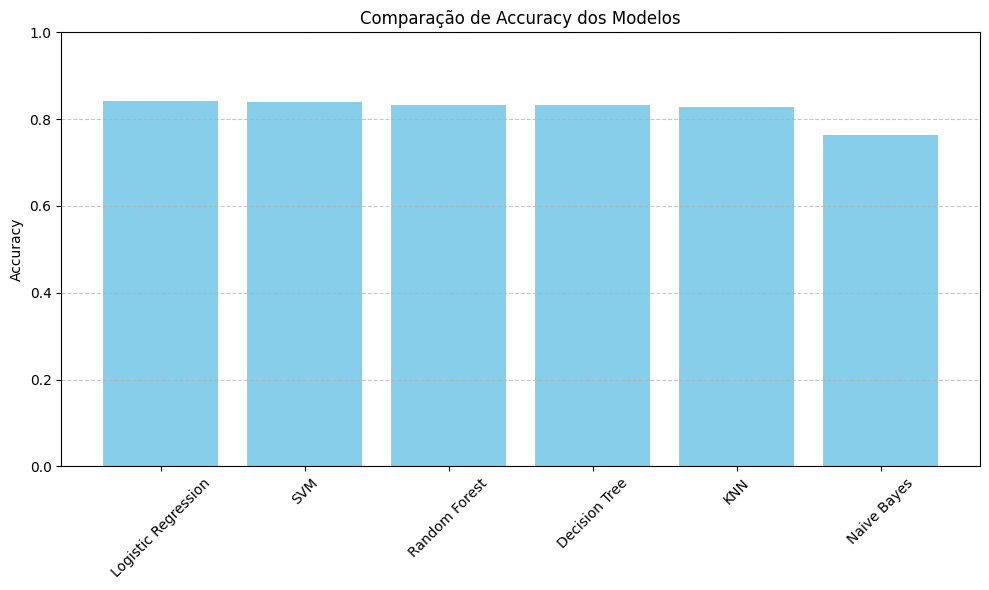

In [102]:
plt.figure(figsize=(10, 6))
plt.bar(df_metricas["Modelo"], df_metricas["Accuracy"], color='skyblue')
plt.title("Comparação de Accuracy dos Modelos")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

🔍 Melhor modelo segundo f1_macro (CV): SVM
✔️ Melhor número de features: 15


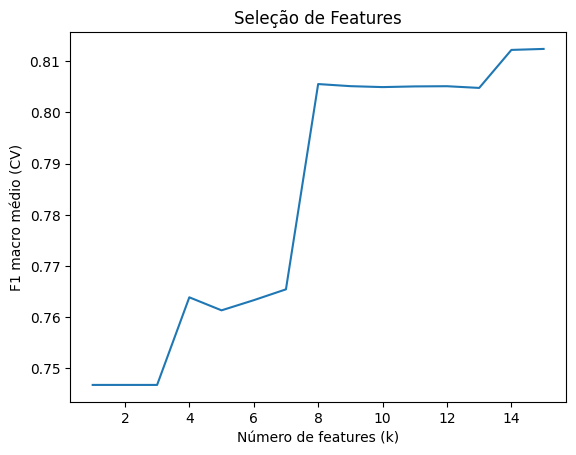

In [103]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# 1. Identificar o melhor modelo segundo f1_macro no CV
melhores = (resultados_grid
            .groupby('Modelo')['mean_test_score']
            .max()
            .sort_values(ascending=False))
best_model_name = melhores.index[0]
best_pipeline = modelos_otimizados[best_model_name]
print(f"🔍 Melhor modelo segundo f1_macro (CV): {best_model_name}")

# 2. Testar diferentes k para SelectKBest
n_features = X_train.shape[1]
k_range = list(range(1, n_features + 1))
mean_f1 = []

for k in k_range:
    pipe_fs = Pipeline([
        ('scaler', StandardScaler()),
        ('select', SelectKBest(score_func=f_classif, k=k)),
        ('clf', best_pipeline.named_steps['clf'])
    ])
    scores = cross_val_score(pipe_fs, X_train, y_train, cv=cv, scoring='f1_macro', n_jobs=-1)
    mean_f1.append(scores.mean())

# 3. Escolher k ótimo e plotar
best_k = k_range[int(np.argmax(mean_f1))]
print(f"✔️ Melhor número de features: {best_k}")

plt.figure()
plt.plot(k_range, mean_f1)
plt.xlabel("Número de features (k)")
plt.ylabel("F1 macro médio (CV)")
plt.title("Seleção de Features")
plt.show()

In [104]:
# 1. Construir pipeline final com SelectKBest(k=best_k)
final_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('select', SelectKBest(score_func=f_classif, k=best_k)),
    ('clf', best_pipeline.named_steps['clf'])
])

# 2. Re-treinar em todo o treino
final_pipeline.fit(X_train, y_train)

# 3. Avaliar no conjunto de teste
y_pred_final = final_pipeline.predict(X_test)
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_final))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_final))

Matriz de Confusão:
[[1147  174]
 [ 135  464]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1321
           1       0.73      0.77      0.75       599

    accuracy                           0.84      1920
   macro avg       0.81      0.82      0.82      1920
weighted avg       0.84      0.84      0.84      1920



In [105]:
import joblib

# Salvar pipeline completo (scaler + select + clf)
joblib.dump(final_pipeline, "modelo_final.pkl")
print("✅ Modelo final salvo em 'modelo_final.pkl'")

✅ Modelo final salvo em 'modelo_final.pkl'


## Análise dos Modelos

Os resultados dos modelos foram analisados com base em quatro métricas principais: Accuracy, Precision, Recall e F1-Score.

| Métrica     | Significado |
|-------------|-------------|
| Accuracy    | Percentagem total de classificações corretas |
| Precision   | Percentagem de positivos previstos que são realmente positivos |
| Recall      | Percentagem de positivos reais que foram corretamente identificados |
| F1-Score    | Média harmónica entre Precision e Recall (equilíbrio entre ambos) |

### Ranking dos Modelos
Com base na **accuracy**, os modelos com melhor desempenho foram:
1. **SVM** com kernel linear
2. **Logistic Regression**
3. **Decision Tree** ajustada
4. **Random Forest** (com `max_depth=10`)
5. **KNN** com `n_neighbors=19` e distância de Manhattan
6. **Naive Bayes**

### Interpretação
- **SVM** e **Logistic Regression** são eficazes para este problema de classificação binária, possivelmente devido à separabilidade dos dados.
- **Modelos baseados em árvore** (Decision Tree e Random Forest) também mostraram bom desempenho e são mais interpretáveis.
- **Naive Bayes**, embora mais simples e rápido, apresentou o desempenho mais baixo, o que pode ser explicado pelas suas suposições fortes (independência entre atributos).
- O **KNN** teve desempenho aceitável, mas depende fortemente da escolha do número de vizinhos e da métrica de distância.

### Considerações Finais
- Todos os modelos foram ajustados com `GridSearchCV`, melhorando significativamente os seus desempenhos em relação às configurações padrão.
- Poderia ser aplicada uma técnica adicional de **seleção de variáveis** para avaliar se o desempenho pode ser mantido ou melhorado com menos atributos.